Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB
None

Missing Values:
Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rat

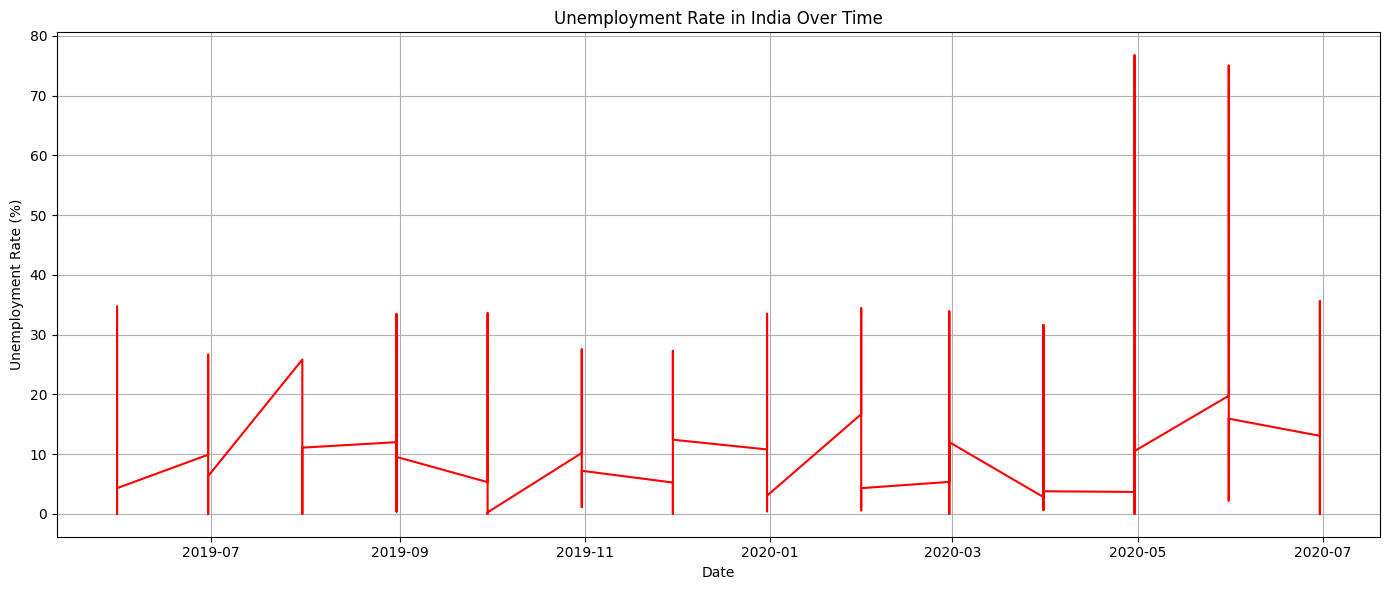

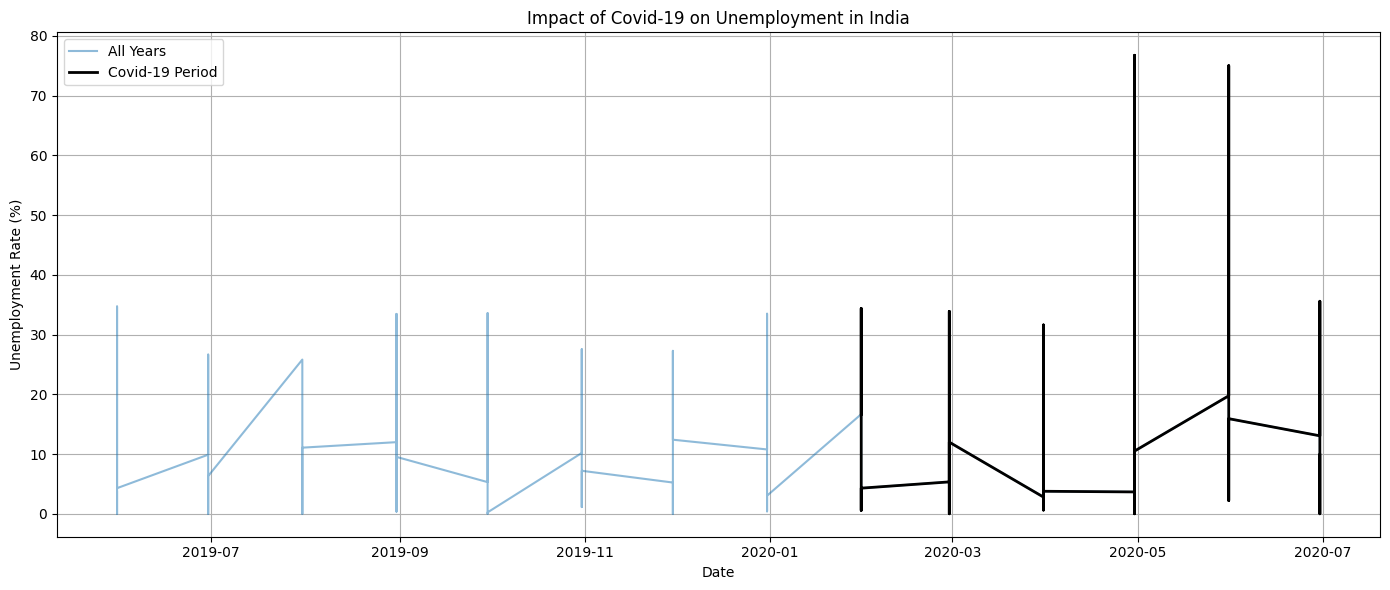


Peak Unemployment During Covid-19 Period: 76.74


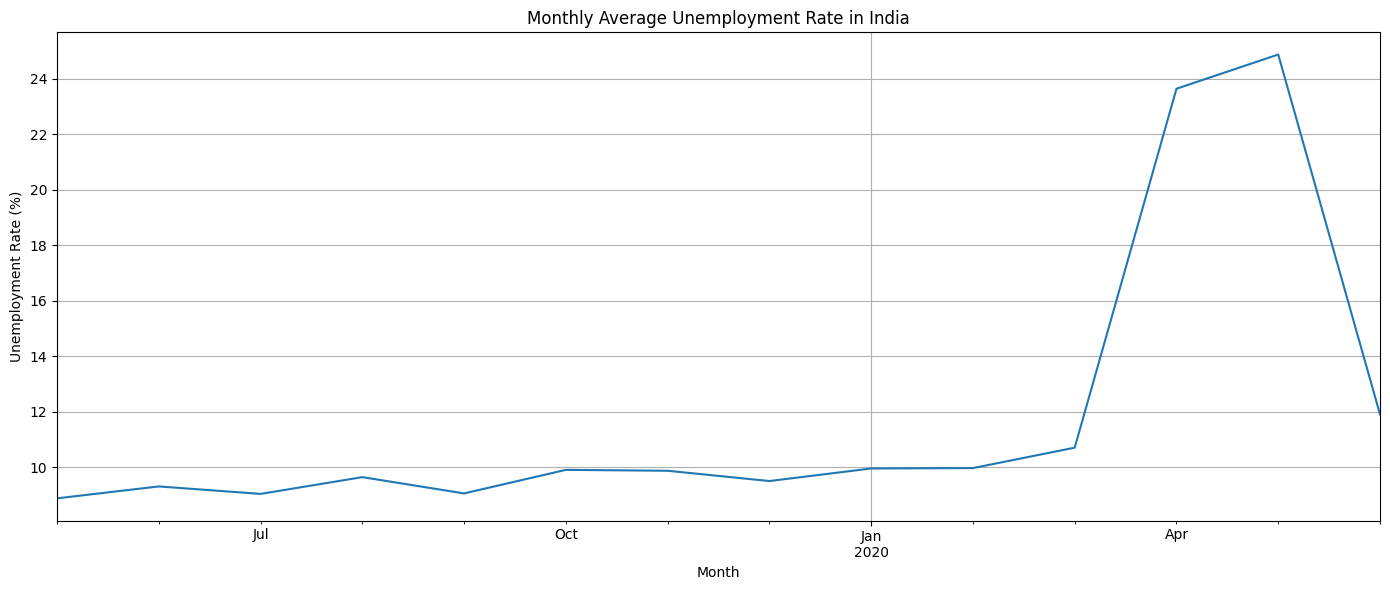

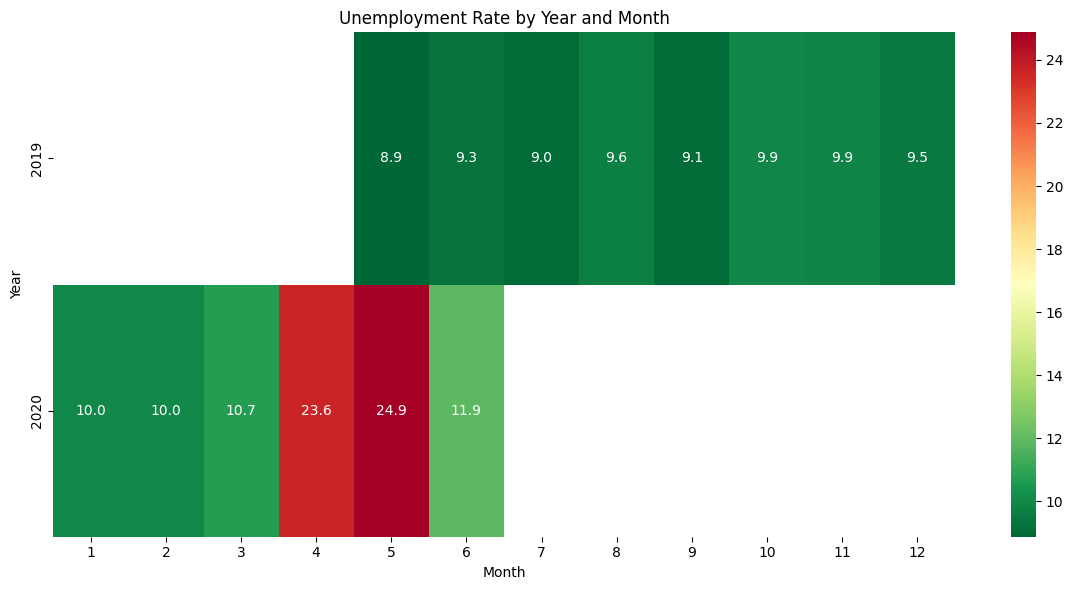

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Load dataset
df = pd.read_csv("Unemployment in India.csv")  # Make sure the file is in your working directory

# Display basic information
print("Dataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

# Drop missing values
df.dropna(inplace=True)

# Convert ' Date' column to datetime and sort
# You may need to adjust this column name if different
if ' Date' in df.columns:
    df[' Date'] = pd.to_datetime(df[' Date'])
else:
    print("Please check: no ' Date' column found in dataset.")
    exit()

df = df.sort_values(' Date')
df.set_index(' Date', inplace=True)

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Plot overall unemployment rate trend
plt.figure(figsize=(14,6))
plt.plot(df.index, df[' Estimated Unemployment Rate (%)'], color='red')
plt.title("Unemployment Rate in India Over Time")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Analyze the impact of Covid-19
covid_period = df.loc['2020':'2021']

plt.figure(figsize=(14,6))
plt.plot(df.index, df[' Estimated Unemployment Rate (%)'], label='All Years', alpha=0.5)
plt.plot(covid_period.index, covid_period[' Estimated Unemployment Rate (%)'], color='black', label='Covid-19 Period', linewidth=2)
plt.title("Impact of Covid-19 on Unemployment in India")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("\nPeak Unemployment During Covid-19 Period:", covid_period[' Estimated Unemployment Rate (%)'].max())

# Monthly trend
monthly_trend = df[' Estimated Unemployment Rate (%)'].resample('M').mean()
plt.figure(figsize=(14,6))
monthly_trend.plot()
plt.title("Monthly Average Unemployment Rate in India")
plt.xlabel("Month")
plt.ylabel("Unemployment Rate (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Create heatmap of unemployment by Year and Month
df['Year'] = df.index.year
df['Month'] = df.index.month
pivot = df.pivot_table(values=' Estimated Unemployment Rate (%)', index='Year', columns='Month')

plt.figure(figsize=(12,6))
sns.heatmap(pivot, cmap="RdYlGn_r", annot=True, fmt=".1f")
plt.title("Unemployment Rate by Year and Month")
plt.xlabel("Month")
plt.ylabel("Year")
plt.tight_layout()
plt.show()